In [1]:
import numpy as np
from statsmodels.datasets import grunfeld
from linearmodels.panel  import PanelOLS
import pandas as pd
import build_data_functions as bdf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import model_functions as mf
import plot_model_functions as pmf

/home/sara/myenv/lib64/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
years = list(range(2005, 2016))

In [3]:
y = pd.read_table("/home/sara/Documents/Immigration/Shared_models/Data/resident_foreigners_norm.csv", sep = "\t", index_col=0)
y = y.groupby(["Province", "Country", "Year"], as_index=False)["Value"].sum()
y = bdf.pivot(y, "Country", "Value")
xs = pd.read_table("/home/sara/Documents/Immigration/Shared_models/Data/x_zones.csv", sep = "\t", index_col=["Province", "Year"])

In [4]:
country = "ROU"

/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1586: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = lstsq(wx, wy)[0]


The R-squared of the regression model is 0.217719.
Estimated parameters:
          parameter
y_prev_1   0.461897
My R2: -0.039886, adj-R2: -0.059507.


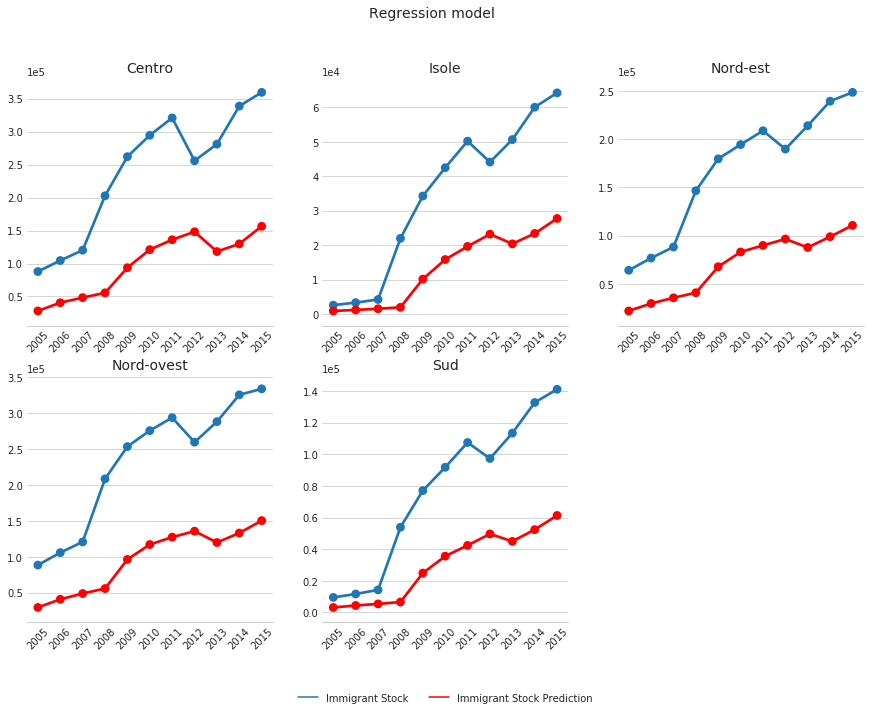

(y_prev_1    0.461897
 Name: parameter, dtype: float64,                  fitted_values
 entity     time               
 Centro     2005   28054.679598
            2006   40571.155408
            2007   48289.910565
            2008   55519.055259
            2009   93660.172316
            2010  121065.887100
            2011  136044.734028
            2012  148189.383023
            2013  118178.109155
            2014  129827.143029
            2015  156467.495041
 Isole      2005     893.308149
            2006    1191.231497
            2007    1528.416062
            2008    1948.280130
            2009   10146.022129
            2010   15826.889203
            2011   19626.913061
            2012   23187.212549
            2013   20378.880830
            2014   23400.146911
            2015   27737.356590
 Nord-est   2005   21787.203760
            2006   29543.834444
            2007   35403.455527
            2008   40691.248541
            2009   67660.932874
            2010 

In [6]:
# PanelOLS uses fixed effect (i.e., entity effects) to eliminate the entity specific components. 
# FirstDifferenceOLS takes the first difference to eliminate the entity specific effect.
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1'],  prev = 1, save = False, diff = True, constant=False)

In [6]:
# PanelOLS uses fixed effect (i.e., entity effects) to eliminate the entity specific components. 
# FirstDifferenceOLS takes the first difference to eliminate the entity specific effect.
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1'],  prev = 1, save = False, True)

The R-squared of the regression model is 0.980167.
Estimated parameters:
          parameter
y_prev_1   1.087218
My R2: 0.940061, adj-R2: 0.938930.


/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


In [7]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2'], prev = 2, save = False)

The R-squared of the regression model is 0.981551.
Estimated parameters:
          parameter
y_prev_1   1.344717
y_prev_2  -0.290197
My R2: 0.944244, adj-R2: 0.943192.


/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


In [8]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2', 'Population'], prev = 2, save = False)

The R-squared of the regression model is 0.984300.
Estimated parameters:
            parameter
y_prev_1     1.160605
y_prev_2    -0.186301
Population   0.001469
My R2: 0.952551, adj-R2: 0.951656.


/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


In [14]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2', 'Population', 'reddito mediano annuale delle famiglie (in euro) - inclusi fitti imputati'], prev = 2, save = False)

The R-squared of the regression model is 0.984638.
Estimated parameters:
                                                    parameter
y_prev_1                                             1.138909
y_prev_2                                            -0.173546
Population                                           0.000295
reddito mediano annuale delle famiglie (in euro...   0.563794
My R2: 0.953574, adj-R2: 0.952698.


/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


In [15]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2', 'Population', 'reddito mediano annuale delle famiglie (in euro) - inclusi fitti imputati', 'attività gratuita per un sindacato - per 100 persone con le stesse caratteristiche',
       'attività gratuita per un sindacato - valori in migliaia',
       'attività gratuite in associazioni di volontariato - per 100 persone con le stesse caratteristiche',
       'attività gratuite in associazioni di volontariato - valori in migliaia',
       'attività gratuite in associazioni non di volontariato - per 100 persone con le stesse caratteristiche',
       'attività gratuite in associazioni non di volontariato - valori in migliaia',
       'riunioni in associazioni culturali, ricreative o di altro tipo - per 100 persone con le stesse caratteristiche',
       'riunioni in associazioni culturali, ricreative o di altro tipo - valori in migliaia',
       'riunioni in associazioni ecologiche, per i diritti civili, per la pace - per 100 persone con le stesse caratteristiche',
       'riunioni in associazioni ecologiche, per i diritti civili, per la pace - valori in migliaia',
       "versare soldi ad un'associazione - per 100 persone con le stesse caratteristiche",
       "versare soldi ad un'associazione - valori in migliaia"], prev = 2, save = False)

The R-squared of the regression model is 0.987765.
Estimated parameters:
                                                       parameter
y_prev_1                                                0.981105
y_prev_2                                               -0.124163
Population                                             -0.006474
reddito mediano annuale delle famiglie (in euro...      4.760209
attività gratuita per un sindacato - per 100 pe... -18608.973314
attività gratuita per un sindacato - valori in ...    246.136497
attività gratuite in associazioni di volontaria...   4428.733270
attività gratuite in associazioni di volontaria...    -41.944500
attività gratuite in associazioni non di volont...   4630.914979
attività gratuite in associazioni non di volont...   -101.429049
riunioni in associazioni culturali, ricreative ... -18223.420282
riunioni in associazioni culturali, ricreative ...    212.135926
riunioni in associazioni ecologiche, per i diri...    968.031816
riunioni in assoc

/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


In [10]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2', 'Population', 'reddito mediano annuale delle famiglie (in euro) - inclusi fitti imputati', 'reddito medio annuale delle famiglie (in euro) - inclusi fitti imputati'], prev = 2, save = False)

The R-squared of the regression model is 0.984773.
Estimated parameters:
                                                    parameter
y_prev_1                                             1.147470
y_prev_2                                            -0.188468
Population                                           0.000525
reddito mediano annuale delle famiglie (in euro...   7.633369
reddito medio annuale delle famiglie (in euro) ...  -6.090537
My R2: 0.953981, adj-R2: 0.953112.


/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


In [13]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2', 'Population', 'reddito mediano annuale delle famiglie (in euro) - inclusi fitti imputati'], prev = 2, save = False)

The R-squared of the regression model is 0.984638.
Estimated parameters:
                                                    parameter
y_prev_1                                             1.138909
y_prev_2                                            -0.173546
Population                                           0.000295
reddito mediano annuale delle famiglie (in euro...   0.563794
My R2: 0.953574, adj-R2: 0.952698.


/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


In [26]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2'] + xs.columns.tolist()[:10], prev = 2, save = False)

The R-squared of the regression model is 0.987326.
Estimated parameters:
                                                      parameter
y_prev_1                                               1.177092
y_prev_2                                              -0.260561
Population                                            -0.006969
work_satisfaction - abbastanza - per 100 person...  2556.642703
work_satisfaction - abbastanza - valori in migl...   -58.857865
work_satisfaction - molto - per 100 persone con... -1082.203715
work_satisfaction - molto - valori in migliaia        71.495781
work_satisfaction - per niente - per 100 person...  5575.024172
work_satisfaction - per niente - valori in migl...   159.299239
work_satisfaction - poco - per 100 persone con ... -6698.685659
work_satisfaction - poco - valori in migliaia        202.632740
reach_difficulty - farmacie - per 100 famiglie ...   -10.249845
My R2: 0.961695, adj-R2: 0.960972.


/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


In [27]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2'] + xs.columns.tolist()[:20], prev = 2, save = False)

The R-squared of the regression model is 0.991522.
Estimated parameters:
                                                       parameter
y_prev_1                                                1.119338
y_prev_2                                               -0.444219
Population                                             -0.043141
work_satisfaction - abbastanza - per 100 person...   7720.885055
work_satisfaction - abbastanza - valori in migl...    -86.231565
work_satisfaction - molto - per 100 persone con...  11128.710750
work_satisfaction - molto - valori in migliaia       -132.826846
work_satisfaction - per niente - per 100 person...  16349.474870
work_satisfaction - per niente - valori in migl...    185.383522
work_satisfaction - poco - per 100 persone con ...  -9174.226341
work_satisfaction - poco - valori in migliaia         404.957034
reach_difficulty - farmacie - per 100 famiglie ... -13852.999304
reach_difficulty - farmacie - valori in migliaia      218.874111
reach_difficulty 

/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


The R-squared of the regression model is 0.998165.
Estimated parameters:
                                                       parameter
y_prev_1                                            1.466518e+00
y_prev_2                                           -8.834196e-01
Population                                         -6.150894e-02
work_satisfaction - abbastanza - per 100 person...  1.248273e+03
work_satisfaction - abbastanza - valori in migl...  1.167908e+02
work_satisfaction - molto - per 100 persone con...  4.125444e+04
work_satisfaction - molto - valori in migliaia     -8.966099e+02
work_satisfaction - per niente - per 100 person... -2.060518e+04
work_satisfaction - per niente - valori in migl...  8.332625e+02
work_satisfaction - poco - per 100 persone con ... -2.273941e+02
work_satisfaction - poco - valori in migliaia       1.567103e+02
reach_difficulty - farmacie - per 100 famiglie ... -3.772939e+04
reach_difficulty - farmacie - valori in migliaia    4.019772e+02
reach_difficulty 

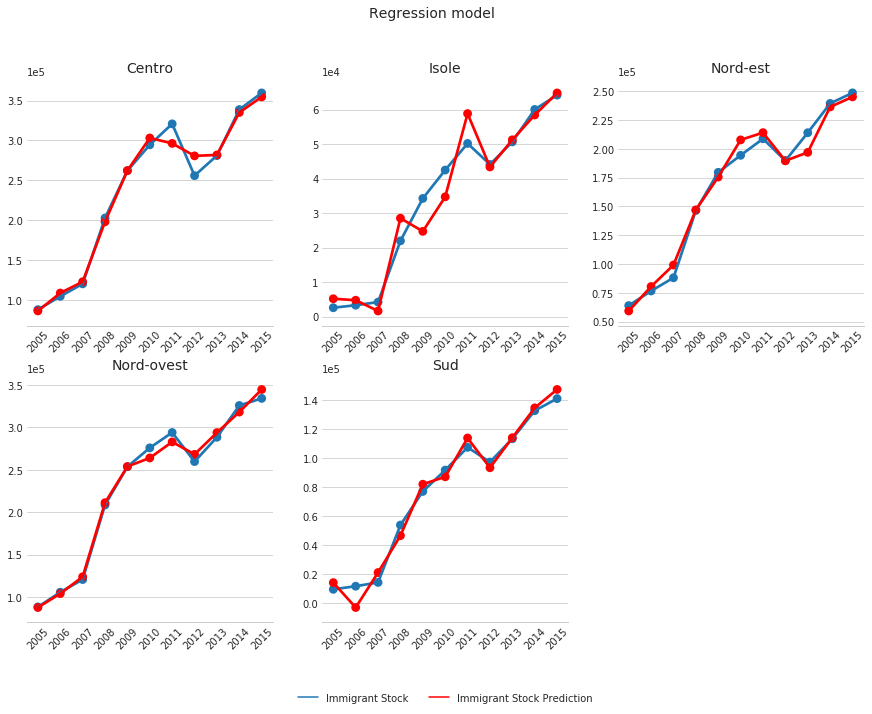

In [5]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2'] + xs.columns.tolist()[:40], prev = 2, save = False)

/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]


The R-squared of the regression model is 0.998165.
Estimated parameters:
                                                       parameter
y_prev_1                                            1.466518e+00
y_prev_2                                           -8.834196e-01
Population                                         -6.150894e-02
work_satisfaction - abbastanza - per 100 person...  1.248273e+03
work_satisfaction - abbastanza - valori in migl...  1.167908e+02
work_satisfaction - molto - per 100 persone con...  4.125444e+04
work_satisfaction - molto - valori in migliaia     -8.966099e+02
work_satisfaction - per niente - per 100 person... -2.060518e+04
work_satisfaction - per niente - valori in migl...  8.332625e+02
work_satisfaction - poco - per 100 persone con ... -2.273941e+02
work_satisfaction - poco - valori in migliaia       1.567103e+02
reach_difficulty - farmacie - per 100 famiglie ... -3.772939e+04
reach_difficulty - farmacie - valori in migliaia    4.019772e+02
reach_difficulty 

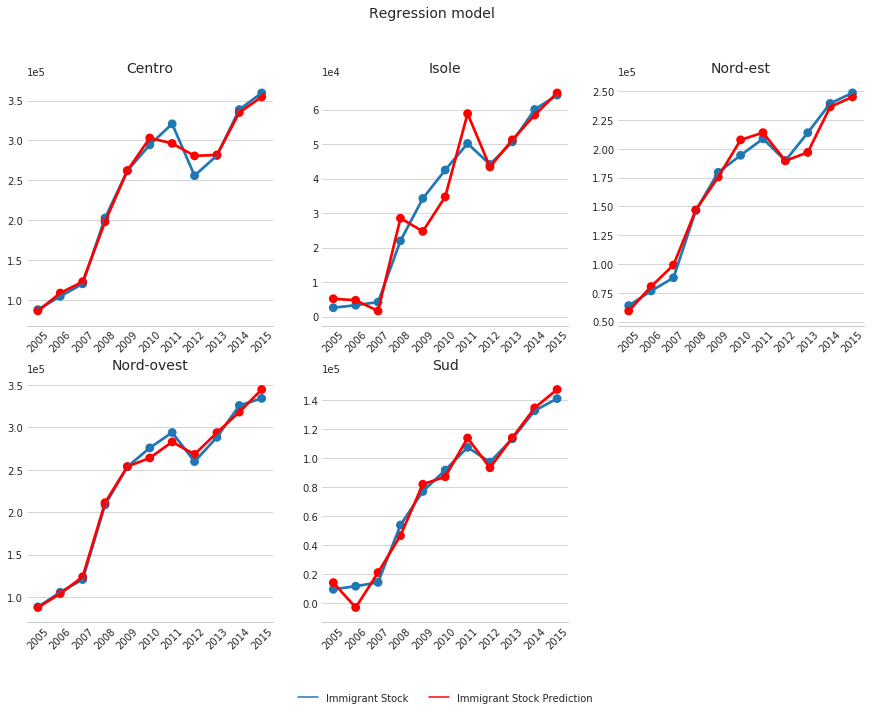

In [20]:
mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2'] + xs.columns.tolist()[:40], prev = 2, save = False)

In [6]:
years = list(range(2005, 2014))

/home/sara/myenv/lib64/python3.6/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]
/home/sara/myenv/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


The R-squared of the regression model is 0.999597.
Estimated parameters:
                                                       parameter
y_prev_1                                            1.615883e+00
y_prev_2                                           -1.339652e+00
Population                                         -4.643657e-02
work_satisfaction - abbastanza - per 100 person...  1.022247e+04
work_satisfaction - abbastanza - valori in migl... -2.179277e+02
work_satisfaction - molto - per 100 persone con...  4.979311e+04
work_satisfaction - molto - valori in migliaia     -7.700373e+02
work_satisfaction - per niente - per 100 person... -1.654264e+04
work_satisfaction - per niente - valori in migl...  1.331337e+03
work_satisfaction - poco - per 100 persone con ... -5.167911e+04
work_satisfaction - poco - valori in migliaia       1.189885e+03
reach_difficulty - farmacie - per 100 famiglie ... -5.886086e+04
reach_difficulty - farmacie - valori in migliaia    9.899360e+02
reach_difficulty 

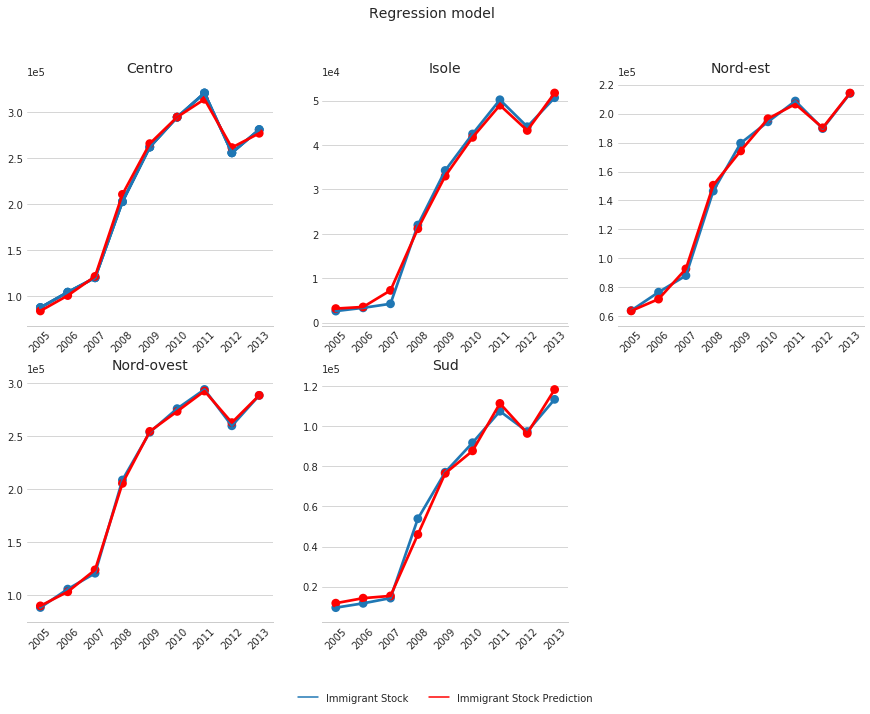

In [35]:
est_par, est_fit = mf.panel_regression(y, xs, years, "ROU", ['y_prev_1', 'y_prev_2'] + xs.columns.tolist()[:40], prev = 2, save = False)

In [8]:
est_par.values

array([ 1.61588341e+00, -1.33965161e+00, -4.64365684e-02,  1.02224695e+04,
       -2.17927700e+02,  4.97931098e+04, -7.70037332e+02, -1.65426377e+04,
        1.33133738e+03, -5.16791115e+04,  1.18988474e+03, -5.88608634e+04,
        9.89936031e+02, -6.12790534e+04,  2.12297517e+03, -2.48524861e+03,
       -1.20927088e+02, -2.00888901e+03,  3.89176379e+01,  3.07573615e+04,
       -9.72459036e+02,  2.35996597e+04, -7.96079502e+02,  3.20481899e+04,
       -2.35373315e+02,  9.81468246e+01, -1.18848167e+02, -1.21026656e+02,
        1.15333328e+02, -3.97131424e+01,  3.46808541e+01,  1.08508805e+03,
        1.47461662e+04,  5.59067205e+06,  1.42730892e+06, -3.36196638e+04,
        2.06521738e+02, -4.16539040e+04,  1.50631738e+02, -9.00768825e+03,
        2.12764963e+02, -4.34050328e+04])

In [9]:
data_all = bdf.filter_origin_country_dataset(y, country, range(2005, 2016), xs.index.levels[0].tolist(), xs, 2)

In [10]:
features_list = ['y_prev_1', 'y_prev_2'] + xs.columns.tolist()[:40]
data = data_all.loc[(slice(None), [2014, 2015]), :][features_list]

In [14]:
y_hat = [0 for i in range(len(data))]
for w, f in zip(est_par.values, data.columns):
    y_hat += w*data[f]

In [17]:
temp_y_hat = pd.DataFrame(y_hat)
temp_y_hat.columns = ["fitted_values"]
y_ = y.loc[(xs.index.levels[0].tolist(), [2014, 2015]), :][country]
temp_y = pd.DataFrame(y_)

In [31]:
complete_y_hat = est_fit.append(temp_y_hat)
complete_y_hat = complete_y_hat.sort_index()

In [34]:
xs.index.levels[0].tolist()

['Centro', 'Isole', 'Nord-est', 'Nord-ovest', 'Sud']

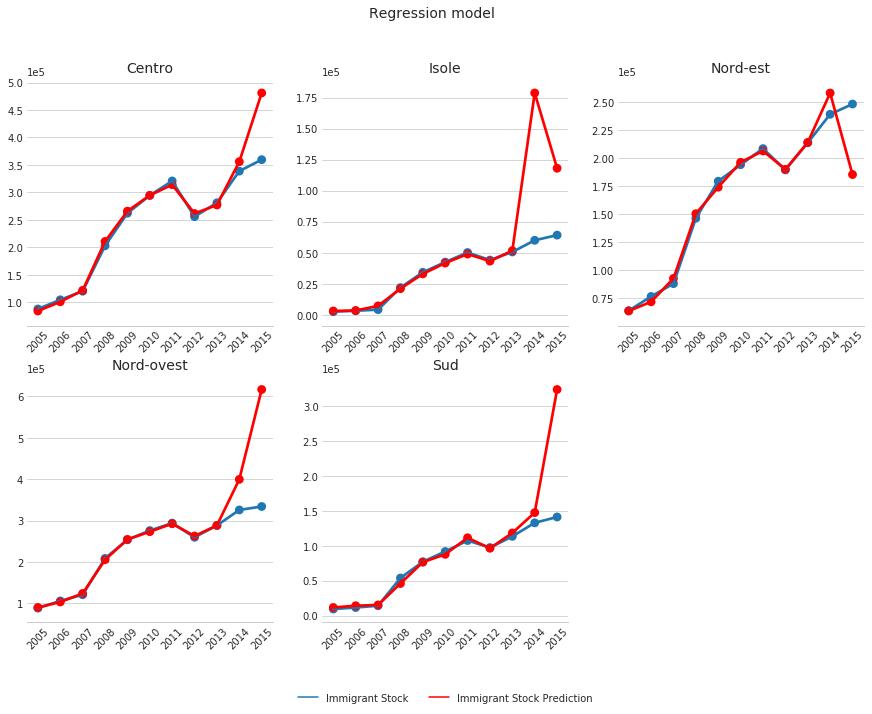

In [47]:
pmf.plot_real_VS_prediction(y, complete_y_hat, xs, list(range(2005, 2016)), country, 45, "Regression model", save = False, path = "")